In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Computational Mathematics  <a class="tocSkip">

## ODE solvers (or time-stepping methods - numerical solution of IVPs) <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Implement-improved-Euler-and-compare-with-forward-Euler" data-toc-modified-id="Homework---Implement-improved-Euler-and-compare-with-forward-Euler-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Implement improved Euler and compare with forward Euler</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-improved-Euler-and-compare-with-forward-Euler" data-toc-modified-id="Solution---Implement-improved-Euler-and-compare-with-forward-Euler-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Implement improved Euler and compare with forward Euler</a></span></li></ul></li><li><span><a href="#Homework---Lorenz-system" data-toc-modified-id="Homework---Lorenz-system-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Lorenz system</a></span><ul class="toc-item"><li><span><a href="#Solution---Lorenz-system" data-toc-modified-id="Solution---Lorenz-system-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Lorenz system</a></span></li></ul></li><li><span><a href="#Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)" data-toc-modified-id="Homework---Implementing-Runge-Kutta-4-stage-method-(RK4)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Implementing Runge-Kutta 4 stage method (RK4)</a></span><ul class="toc-item"><li><span><a href="#Solution---Implementing-Runge-Kutta-4-stage-method-(RK4)" data-toc-modified-id="Solution---Implementing-Runge-Kutta-4-stage-method-(RK4)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Implementing Runge-Kutta 4 stage method (RK4)</a></span></li></ul></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from matplotlib import rcParams
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Implement improved Euler and compare with forward Euler

Consider the simple scalar equation

$$y'(t)=y,\;\;\; y(0)=1\,.$$

Implement the forward Euler and improved Euler schemes and use them to approximate solutions of this equation for different values of $\Delta t$. Plot the solutions over the time interval $[0, 2\pi]$.

Write a function `approx_error(f, y0, t0, t, h)` that returns the approximation error at a given time $t$ for both methods.

Using a while loop, compute the error at $t=3$ for $\Delta t$ from $1$ to $10^{-5}$, and plot it against $\Delta t$ in logarithmic scale.

Use `numpy.polyfit` to compute a line of best fit to the logs of the data and hence conclude the order of accuracy of both methods.

You should observe that improved Euler is much better than forward Euler - plot the error as a function of time (suggest you use a semilogy in matplotlib to get a log axis on the $y$ axis, but plot the $x$ (time) axis normally. 

See if you can get [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) working for this problem and see how its errors compare as a function of time - hint: take note of the order that odeint assumes the function $f$ takes the arguments $t$ and $y$, you can pass the argument `tfirst=True` to tell it to assume an order consistent with what convention we assume.

### Solution - Implement improved Euler and compare with forward Euler

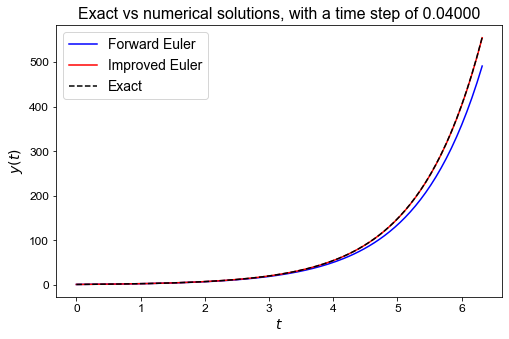

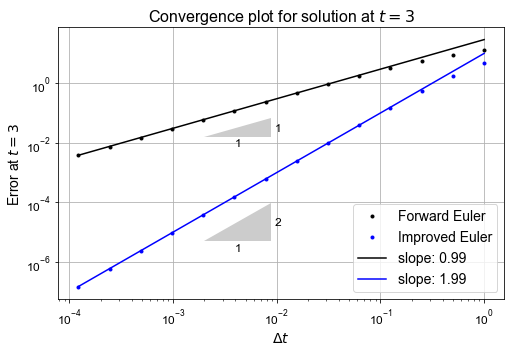

In [3]:
def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def f(t, y):
    val = y
    return val

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

yall, tall = forward_euler(f, y0, t0, tf, dt)
ax1.plot(tall, yall, 'b', label='Forward Euler')

yall, tall = improved_euler(f, y0, t0, tf, dt)
ax1.plot(tall, yall, 'r', label='Improved Euler')

ax1.plot(tall, np.exp(tall), 'k--', label='Exact')
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y(t)$', fontsize=14)
ax1.set_title('Exact vs numerical solutions, with a time step of {0:.5f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)


def approx_error(dt, t_max):
    yall, tall = forward_euler(f, y0, t0, t_max, dt)
    err1 = abs(yall[-1]-np.exp(t_max))
    yall, tall = improved_euler(f, y0, t0, t_max, dt)
    err2 = abs(yall[-1]-np.exp(t_max))
    return err1, err2


error_fe = []
error_ie = []
dt_array = []
dt = 1
while dt > 1.e-4:
    dt_array.append(dt)
    err1, err2 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.set_title('Convergence plot for solution at $t=3$', fontsize=16)
ax1.grid(True)
annotation.slope_marker((2e-3, 1.5e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 5e-6), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))

ax1.legend(loc='best', fontsize=14);

So the convergence data and plots indicates that forward Euler is first-order accurate and improved Euler is second-order.

From the first plot above we see that we can't actually see any difference between the improved Euler numerical and the exact solution over the time interval considered.

Let's plot the error as a function of time and see how good this really is, but comparing with a call to an inbuilt SciPy solver.

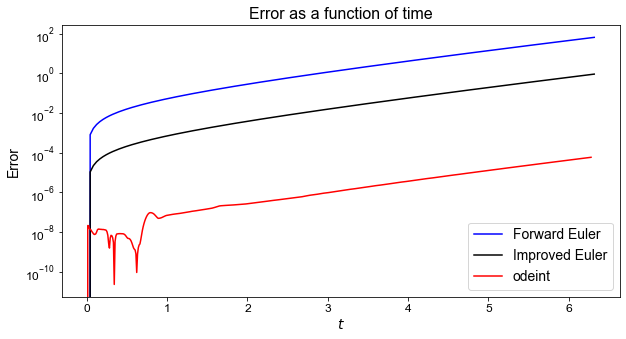

In [4]:
from scipy.integrate import odeint

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
tf = 2*np.pi

def f(t, y):
    val = y
    return val

# note that odeint assumes the arguments to the function in the other order
def f2(y, t):
    val = y
    return val


# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

yall, tall = forward_euler(f, y0, t0, tf, dt)
ax1.semilogy(tall, np.abs(yall - np.exp(tall)), 'b', label='Forward Euler')

yall, tall = improved_euler(f, y0, t0, tf, dt)
ax1.semilogy(tall, np.abs(yall - np.exp(tall)), 'k', label='Improved Euler')

# these are the OUTPUT times we want odeint to tell us the solution at
t_odeint = np.arange(t0, tf, 0.01)
# solve using odeint
y_odeint = odeint(f2, y0, t_odeint) 
ax1.plot(t_odeint, np.abs(y_odeint[:,0] - np.exp(t_odeint)), 'r', label='odeint')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Error as a function of time', fontsize=16)
ax1.legend(loc='best', fontsize=14);

So `odeint` has substantially lower errors than both of our methods!

We'll see why in the next lecture.

## Homework - Lorenz system

Recall the image at the beginning of the lecture.

The [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system "Lorenz system") comprises three coupled ODEs:

\begin{align*}
\frac{dx}{dt} &= \sigma (y - x), \\[5pt]
\frac{dy}{dt} &= x(\rho - z) - y, \\[5pt]
\frac{dz}{dt} &= x  y - \beta  z,
\end{align*}

where typical values of the parameters (for a chaotic solution) are $\rho = 28, \, \sigma = 10, \, \beta = 8/3$.

Use forward Euler and improved Euler solvers to plot a solution trajectory - do you see qualitative differences between your trajectories with the two solvers.

To check your answer (after you have attempted it please!), see [https://matplotlib.org/examples/mplot3d/lorenz_attractor.html](https://matplotlib.org/examples/mplot3d/lorenz_attractor.html).

See also [https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation](https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation) for a solution that uses scipy's odeint function. 


Now use your forward Euler and improved Euler solvers to compute and plot the growth in 'error' as a function of time, where here we are defining 'error' to be the difference compared to a solution obtained with `odeint`. 



### Solution - Lorenz system

Text(0.5, 0.92, 'Lorenz system computed with odeint')

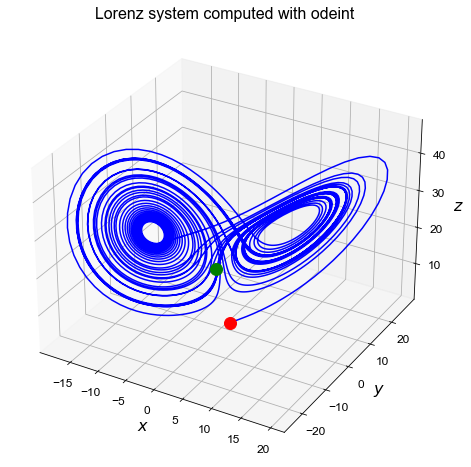

In [5]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# problem parameters
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

# RHS function - NOTE THAT if we have t as the first argument we need to tell
# odeint this using tfirst=True
def f(t, state):
    """ RHS function for Lorenz system
    """
    f = np.zeros_like(state)
    # unpack the state vector
    x, y, z = state  
    f[0] = sigma * (y - x)
    f[1] = x * (rho - z) - y
    f[2] = x * y - beta * z
    return f

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

# times we want to get output from ODE solver, use same spacing as
# the dt we use on our own solvers
dt = 0.01
t = np.arange(0.0, 40.0, dt)

# solve using odeint
states = odeint(f, state0, t, tfirst=True)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot(states[:, 0], states[:, 1], states[:, 2], 'b')
ax1.plot( [states[0, 0]], [states[0, 1]], [states[0, 2]], 'ro', markersize=12)
ax1.plot( [states[-1, 0]], [states[-1, 1]], [states[-1, 2]], 'go', markersize=12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system computed with odeint', fontsize = 16)

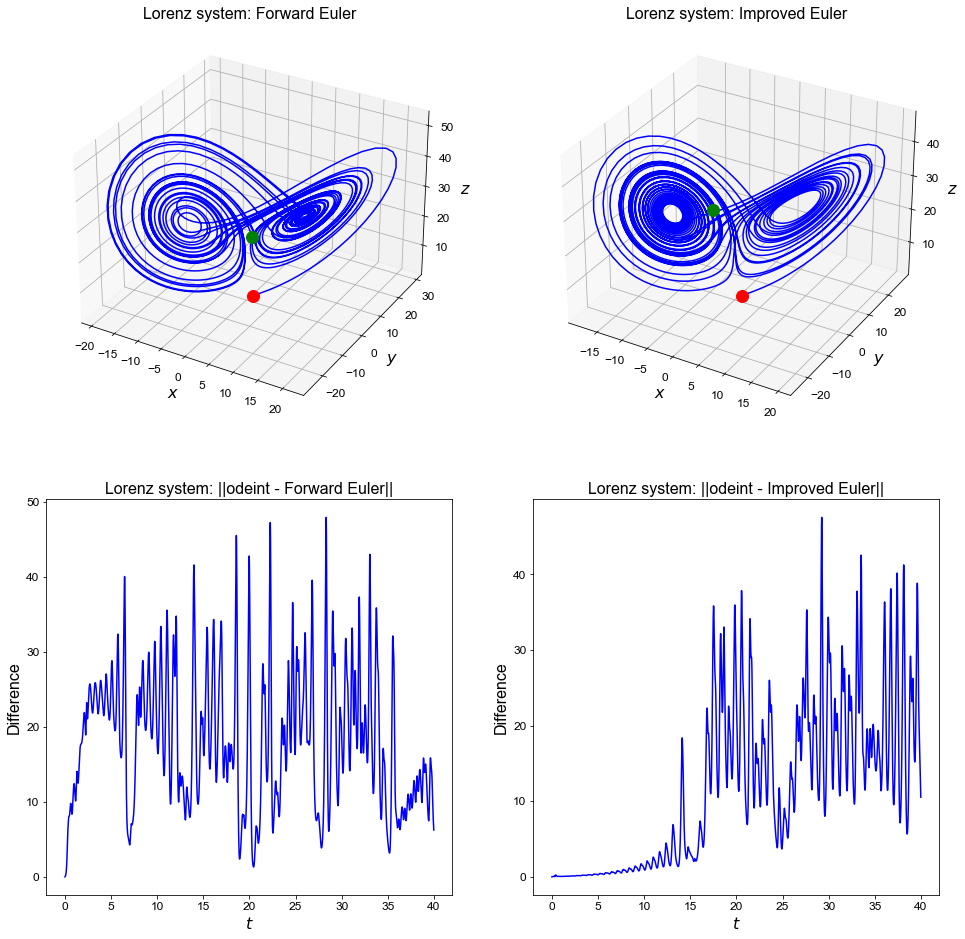

In [6]:
# let's test our own solver functions

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

# initial condition
state0 = [1.0, 1.0, 1.0]

states_fe, t_fe = forward_euler(f, state0, 0., 40.0, 0.01)

states_ie, t_ie = improved_euler(f, state0 , 0., 40.0, 0.01)

fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot(states_fe[:, 0], states_fe[:, 1], states_fe[:, 2], 'b')
ax1.plot( [states_fe[0, 0]], [states_fe[0, 1]], [states_fe[0, 2]], 'ro', markersize=12)
ax1.plot( [states_fe[-1, 0]], [states_fe[-1, 1]], [states_fe[-1, 2]], 'go', markersize=12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: Forward Euler', fontsize = 16)

ax1 = fig.add_subplot(2, 2, 3)

ax1.plot(t, np.linalg.norm(states - states_fe[:-1,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title('Lorenz system: ||odeint - Forward Euler||', fontsize = 16)

ax1 = fig.add_subplot(2, 2, 2, projection='3d')

ax1.plot(states_ie[:, 0], states_ie[:, 1], states_ie[:, 2], 'b')
ax1.plot( [states_ie[0, 0]], [states_ie[0, 1]], [states_ie[0, 2]], 'ro', markersize=12)
ax1.plot( [states_ie[-1, 0]], [states_ie[-1, 1]], [states_ie[-1, 2]], 'go', markersize=12)
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('Lorenz system: Improved Euler', fontsize = 16)

ax1 = fig.add_subplot(2, 2, 4)

ax1.plot(t, np.linalg.norm(states - states_ie[:-1,:], axis=1), 'b')
ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('Difference', fontsize = 16)
ax1.set_title(r'Lorenz system: ||odeint - Improved Euler||', fontsize = 16);

Note that the improved Euler solution stays close to the `odeint` solution for far longer at the start, both of our simple solvers ultimately diverge from this (itself approximate) solution, but then due to the constrained nature of the Lorenz orbits the errors are constrained in magnitude.

## Homework - Implementing Runge-Kutta 4 stage method (RK4)

Write a general Python function that implements the classical RK4 method for a given RHS function, and apply it to the problem we used previously to compare the errors between forward Euler and improved Euler (recalling that we can interpret IE as a predictor-corrector LMS pair, or as a Runge-Kutta method RK2($\alpha=1$)):

$$y'(t)=y,\;\;\; y(0)=1,$$

and where we evaluate the error at the time $t = 2\pi$.

### Solution - Implementing Runge-Kutta 4 stage method (RK4)

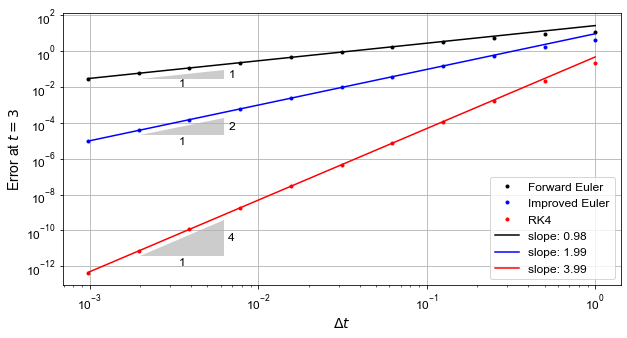

In [7]:
def f(t, y):
    val = y
    return val

def RK4(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]                 
    while t < t_max:
        k1 = dt*f(t, y)
        k2 = dt*f(t + 0.5*dt, y + 0.5*k1)
        k3 = dt*f(t + 0.5*dt, y + 0.5*k2)
        k4 = dt*f(t + dt, y + k3)
        y = y + (1./6.)*(k1 + 2*k2 + 2*k3 + k4)
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)



# problem parameters
dt = 0.04
u0 = 1.0
t0 = 0.0
tf = 2*np.pi

def approx_error(dt, t_max):
    uall, tall = forward_euler(f, u0, t0, t_max, dt)
    err1 = abs(uall[-1]-np.exp(t_max))
    uall, tall = improved_euler(f, u0, t0, t_max, dt)
    err2 = abs(uall[-1]-np.exp(t_max))
    uall, tall = RK4(f, u0, t0, t_max, dt)
    err3 = abs(uall[-1]-np.exp(t_max))
    return err1, err2, err3


error_fe = []
error_ie = []
error_rk4 = []
dt_array = []
dt = 1.
while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2, err3 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    error_rk4.append(err3)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_rk4, 'r.', label='RK4')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

# what does this parameter do, and what happens if you choose equal to a smaller value
start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_rk4 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk4[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk4[1]) * dt_array**(line_fit_rk4[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_rk4[0]))

annotation.slope_marker((2e-3, 3e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 2e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 4e-12), (4, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

# save figure to use in lecture
#fig.savefig('RK4-comparison.png', dpi=600, format='png', facecolor='w', edgecolor='w')